In [1]:
import pandas as a
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=a.read_csv(r"E:\xlsx\flat500.csv")

In [3]:
data.head(5)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [4]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [5]:
data.tail(10)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1528,1529,lounge,51,2861,126000,1,43.841980,10.51531,5500
1529,1530,lounge,51,731,22551,1,38.122070,13.36112,9900
1530,1531,lounge,51,670,29000,1,45.764648,8.99450,10800
1531,1532,sport,73,4505,127000,1,45.528511,9.59323,4750
1532,1533,pop,51,1917,52008,1,45.548000,11.54947,9900
1533,1534,sport,51,3712,115280,1,45.069679,7.70492,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.66687,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.41348,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.68227,5990
1537,1538,pop,51,1766,54276,1,40.323410,17.56827,7900


In [6]:
data['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [8]:
data.groupby(['model']).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [9]:
data.groupby(['previous_owners']).count()

,ID,model,engine_power,age_in_days,km,lat,lon,price
previous_owners,,,,,,,,
1,1389,1389,1389,1389,1389,1389,1389,1389
2,117,117,117,117,117,117,117,117
3,23,23,23,23,23,23,23,23
4,9,9,9,9,9,9,9,9


In [10]:
data['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [11]:
data.shape
#df=data
#data=df.loc[(df.model=='lounge')&(df.previous_owners==1)]

(1538, 9)

In [12]:
data1=data.drop(['lat','ID'],axis=1) #unwanted columns removed

In [13]:
#2-3
data2=data1.drop('lon',axis=1)

In [14]:
data2.shape


(1538, 6)

In [15]:
data2.head(3)

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200


In [16]:
data2=a.get_dummies(data2,dtype=int)

In [17]:
#data2.groupby(['previous_owners'])
data2.shape

(1538, 8)

In [18]:
data2.head(3)

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1


In [19]:
y=data2['price']
X=data2.drop('price',axis=1)


In [20]:
y


0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [21]:
X

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0
4,73,3074,106880,1,0,1,0
...,...,...,...,...,...,...,...
1533,51,3712,115280,1,0,0,1
1534,74,3835,112000,1,1,0,0
1535,51,2223,60457,1,0,1,0
1536,51,2557,80750,1,1,0,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=49) #0.67 data will be for training.



In [23]:
X_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
776,51,762,17000,1,1,0,0
487,51,425,20636,1,1,0,0
1462,62,3470,90000,1,0,1,0
89,51,397,17912,1,1,0,0
852,51,1035,33000,1,1,0,0


In [24]:
X_train.shape

(1030, 7)

In [25]:
y_train.shape

(1030,)

In [26]:




from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train) #training and fitting LR object using training data

LinearRegression()

In [27]:


#X_test=[[51,2197,70000,1,1,0,0],[51,3127,100000,1,1,0,0],[51,5227,175000,1,1,0,0]]

In [28]:
#above line to actual

In [29]:
ypred=reg.predict(X_test) 

In [30]:
ypred

array([10077.0486545 , 10296.89113709,  6231.54053645, 10371.87050424,
        9543.8908106 , 10311.36861938,  8883.57598947,  7157.79300792,
        9944.27338867, 10426.6142839 ,  9912.02921839,  7492.70862718,
        9882.00387912,  6645.64608231, 10333.80213676,  8020.94888715,
       10228.57854658, 10530.25049259,  9188.10296552,  8658.91690616,
        7685.86894274,  9410.15189019,  8825.54005856,  9911.92508766,
       10103.04304765,  6699.79552359,  6254.1941181 ,  6353.64026044,
        4685.57678728, 10147.55738739,  9412.7006505 ,  4999.96883869,
        9396.11094252,  9701.00047514,  8245.07179202,  7014.74657124,
        9855.0499626 ,  8022.65546956,  6202.74656775, 10387.44465039,
        7477.65149429,  6555.14982661, 10368.68963757,  5057.57213783,
        9652.3799067 ,  9312.51608202,  8642.27980214,  9966.91032444,
        5663.75605319,  7526.68879785,  4958.61357652,  9346.67438618,
       10022.93146835, 10140.06080681,  6436.7985707 ,  5851.7441137 ,
      

In [31]:
filename='pricemodeldummy1'
pickle.dump(reg,open(filename,'wb'))

In [32]:
#savedmodel=pickle.load(open(filename,'rb'))

#X_test=[[1,75,1062,8000,1]]
#savedmodel.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.843287174399413

In [34]:
from sklearn.metrics import mean_squared_error #calculating MSE
mean_squared_error(ypred,y_test)

577671.0281058011

In [35]:
#Results= pd.DataFrame(columns=['Actual','Predicted'])
#Results['Actual']=y_test
Results= a.DataFrame(columns=['Price','Predicted'])
Results['Price']=y_test
Results['Predicted']=ypred
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,Price,Predicted,Id
0,776,9850,10077.048654,0
1,487,10650,10296.891137,1
2,1462,5199,6231.540536,2
3,89,9970,10371.870504,3
4,852,9999,9543.890811,4
5,12,9700,10311.368619,5
6,353,8900,8883.575989,6
7,76,7900,7157.793008,7
8,633,8900,9944.273389,8
9,181,10950,10426.614284,9


[]

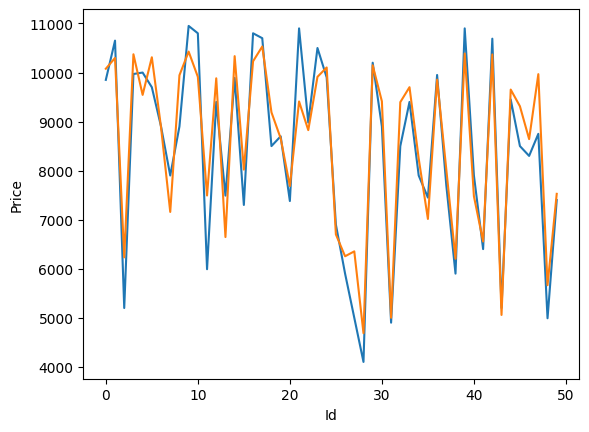

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

[]

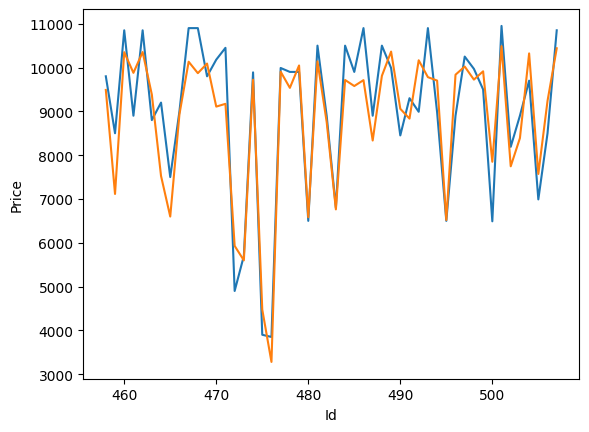

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Id',y='Price',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()

# this is for prediction of a new veicle with spec

In [38]:
new=[[51,2197,70000,1,1,0,0]]

In [39]:
real=reg.predict(new)

In [40]:
real

array([7857.45949044])

In [41]:
# ridge regression

In [42]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV


from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [43]:
ridge_regressor.best_params_

{'alpha': 30}

In [44]:
#X_train=[2]

In [45]:
ridge=Ridge(alpha=30)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

578069.1348754477

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)


0.8431791744587434

In [48]:
Results= a.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_ridge
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,776,9850,10073.489785,0
1,487,10650,10293.318926,1
2,1462,5199,6250.181303,2
3,89,9970,10368.300682,3
4,852,9999,9540.320853,4
5,12,9700,10307.799776,5
6,353,8900,8902.872087,6
7,76,7900,7176.381624,7
8,633,8900,9963.615342,8
9,181,10950,10423.047838,9


[]

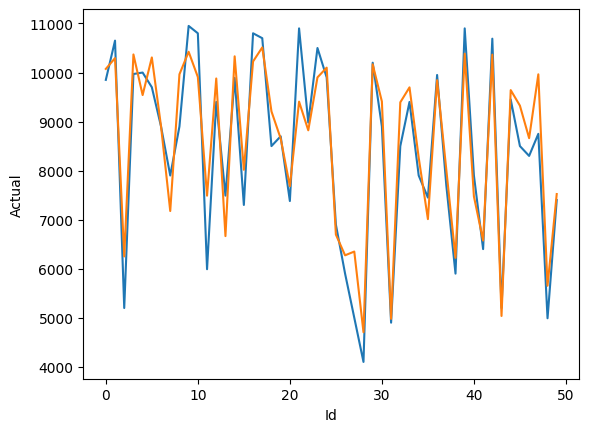

In [49]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

[]

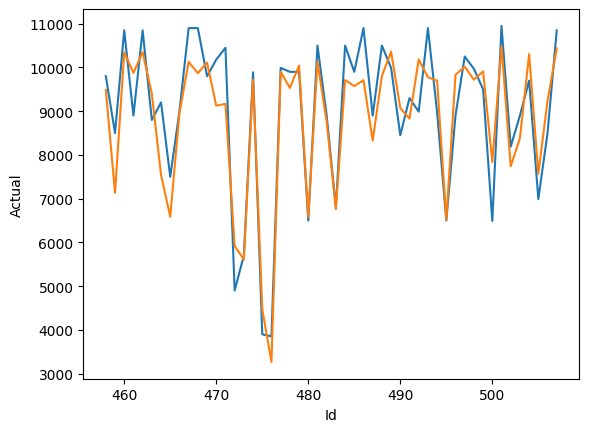

In [50]:
sns.lineplot(x='Id',y='Actual',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()

In [51]:
#elastic

In [52]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [53]:
elastic_regressor.best_params_

{'alpha': 1}

In [54]:
elastic=ElasticNet(alpha=.01)
elastic.fit(X_train,y_train)
y_pred_elastic=elastic.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.8432710765986537

In [56]:
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

577730.3674296838

In [57]:
Results= a.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,776,9850,10076.381384,0
1,487,10650,10296.212886,1
2,1462,5199,6235.217128,2
3,89,9970,10371.190039,3
4,852,9999,9543.240584,4
5,12,9700,10310.690582,5
6,353,8900,8887.224255,6
7,76,7900,7161.424233,7
8,633,8900,9947.892996,8
9,181,10950,10425.932562,9


[]

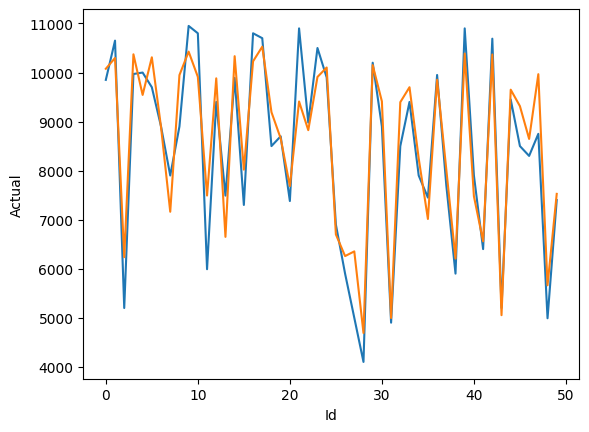

In [58]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

In [59]:
#RandomForest

In [60]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth=[1,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [61]:
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

In [63]:
cls=RandomForestClassifier(n_estimators=125,criterion='entropy',max_depth=5)

In [64]:
cls.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=125)

In [65]:
y_pred=cls.predict(X_test)

In [66]:
y_pred

array([ 9900, 10500,  3990, 10500,  9400, 10900,  7900,  7500,  9900,
       10500,  9400,  6900,  9400,  5699, 10900,  6900, 10500, 11000,
        8500,  8900,  6900,  9400,  8900,  9400,  9900,  6900,  4900,
        5900,  4900,  9500,  9400,  4500,  9400,  9400,  7900,  6900,
        9400,  6900,  5699, 10500,  6900,  5699, 10500,  4490,  9400,
        6990,  7900,  9900,  4800,  7400,  5500,  8800,  9400,  9500,
        5900,  5500,  6800,  9900,  9900, 10500,  9900,  8900, 10900,
       10500,  9400,  7500,  6900,  5500,  9400,  7450,  5500,  6600,
        5500,  9900,  6900,  7900,  4500,  7450,  6900,  7450,  4500,
        6500,  5900,  7900,  6900,  7900,  9900,  7900,  8900,  8900,
       10900,  7500,  6900,  6900,  9400,  9900,  8900,  8900,  9400,
        6900,  6500,  9400,  9900,  9400, 10500, 10900, 10500, 10500,
        7500,  9900,  9400,  6900,  7900,  5699,  9400,  9500,  8900,
       10900,  4500,  4500, 10500,  7450,  9900,  9900,  4900,  9400,
        9400,  7900,

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7565526020150138

In [68]:
Results= a.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,776,9850,9900,0
1,487,10650,10500,1
2,1462,5199,3990,2
3,89,9970,10500,3
4,852,9999,9400,4
5,12,9700,10900,5
6,353,8900,7900,6
7,76,7900,7500,7
8,633,8900,9900,8
9,181,10950,10500,9


[]

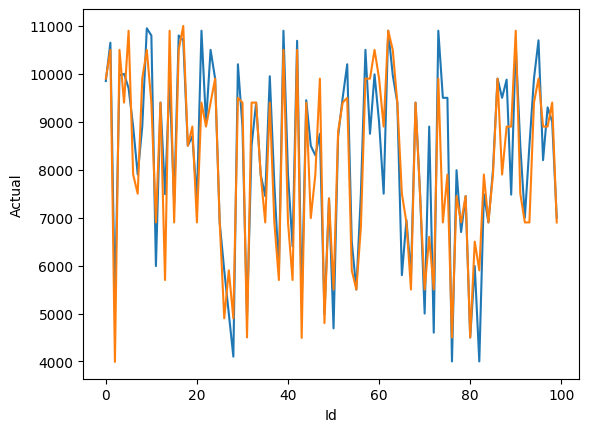

In [69]:
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()